In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading input file
file = "NFHS.xlsx" # file path
data = pd.read_excel(file)
data

,Sl.No,Category,Indicators (2019-20),Urban,Rural,Total (2019-20),Total (2015-16),Adilabad,Bhadradri,Hyderabad,...,Rajanna Sircilla,Ranga Reddy,Sangareddy,Siddipet,Suryapet,Vikarabad,"Wanaparthy,",Warangal Rural,Warangal Urban,Yadadri
0,1,Tobacco Use and Alcohol Consumption among Adul...,101. Women age 15 years and above who use any ...,2.6,7.2,5.6,na,11.0,4.7,1.7,...,8.5,4.5,5.4,5.2,3.0,11.6,8.9,2.8,1.5,5.6
1,2,Tobacco Use and Alcohol Consumption among Adul...,102. Men age 15 years and above who use any ki...,15.2,26.5,22.3,na,29.7,28.4,12.4,...,19.4,18.9,27.3,23.2,20.8,29.2,27.5,23.2,14.0,22.2
2,3,Tobacco Use and Alcohol Consumption among Adul...,103. Women age 15 years and above who consume ...,2.6,9.0,6.7,na,2.1,2.9,0.7,...,6.1,6.7,11.2,8.3,6.1,17.0,8.7,6.5,2.9,12.9
3,4,Tobacco Use and Alcohol Consumption among Adul...,104. Men age 15 years and above who consume al...,33.9,49.0,43.3,na,28.3,38.8,28.0,...,49.9,46.8,39.7,50.3,46.7,44.7,48.7,54.4,43.3,58.4


In [3]:
data.drop(['Category', 'Indicators (2019-20)'], axis=1, inplace=True) # dropping Category and Indicators columns
data.insert(1,"Compound, Gender",["T,F","T,M","A,F","A,M"]) # Inserting "Compound, Gender" column
data

,Sl.No,"Compound, Gender",Urban,Rural,Total (2019-20),Total (2015-16),Adilabad,Bhadradri,Hyderabad,Jagitial,...,Rajanna Sircilla,Ranga Reddy,Sangareddy,Siddipet,Suryapet,Vikarabad,"Wanaparthy,",Warangal Rural,Warangal Urban,Yadadri
0,1,"T,F",2.6,7.2,5.6,na,11.0,4.7,1.7,11.2,...,8.5,4.5,5.4,5.2,3.0,11.6,8.9,2.8,1.5,5.6
1,2,"T,M",15.2,26.5,22.3,na,29.7,28.4,12.4,23.5,...,19.4,18.9,27.3,23.2,20.8,29.2,27.5,23.2,14.0,22.2
2,3,"A,F",2.6,9.0,6.7,na,2.1,2.9,0.7,2.6,...,6.1,6.7,11.2,8.3,6.1,17.0,8.7,6.5,2.9,12.9
3,4,"A,M",33.9,49.0,43.3,na,28.3,38.8,28.0,47.6,...,49.9,46.8,39.7,50.3,46.7,44.7,48.7,54.4,43.3,58.4


In [4]:
data.shape

(4, 37)

In [5]:
col = data.pop("Total (2019-20)")
data.insert(2,"Total (2019-20)",col) # Moving position of Total (2019-20) column
data.pop("Total (2015-16)") # Removing Total (2015-16) which contains na value
data

,Sl.No,"Compound, Gender",Total (2019-20),Urban,Rural,Adilabad,Bhadradri,Hyderabad,Jagitial,Jangoan,...,Rajanna Sircilla,Ranga Reddy,Sangareddy,Siddipet,Suryapet,Vikarabad,"Wanaparthy,",Warangal Rural,Warangal Urban,Yadadri
0,1,"T,F",5.6,2.6,7.2,11.0,4.7,1.7,11.2,4.1,...,8.5,4.5,5.4,5.2,3.0,11.6,8.9,2.8,1.5,5.6
1,2,"T,M",22.3,15.2,26.5,29.7,28.4,12.4,23.5,27.1,...,19.4,18.9,27.3,23.2,20.8,29.2,27.5,23.2,14.0,22.2
2,3,"A,F",6.7,2.6,9.0,2.1,2.9,0.7,2.6,11.3,...,6.1,6.7,11.2,8.3,6.1,17.0,8.7,6.5,2.9,12.9
3,4,"A,M",43.3,33.9,49.0,28.3,38.8,28.0,47.6,60.6,...,49.9,46.8,39.7,50.3,46.7,44.7,48.7,54.4,43.3,58.4


In [6]:
# Creating another data frame as shown in below output

data2 = pd.DataFrame(columns=["Place","T,F","T,M","A,F","A,M"])
n = len(data.columns)
for i in range(5,n):
    data_col_name = data.columns[i]
    data_col = data[data_col_name]
    new_row = {"Place":data_col_name,"T,F":data_col[0],"T,M":data_col[1],"A,F":data_col[2],"A,M":data_col[3]}
    data2 = data2.append( new_row, ignore_index = True)
data2.head()


,Place,"T,F","T,M","A,F","A,M"
0,Adilabad,11.0,29.7,2.1,28.3
1,Bhadradri,4.7,28.4,2.9,38.8
2,Hyderabad,1.7,12.4,0.7,28.0
3,Jagitial,11.2,23.5,2.6,47.6
4,Jangoan,4.1,27.1,11.3,60.6


In [7]:
data2["Women_T&A"] = (data2["T,F"]+data2["A,F"])/2     # Avg percentage of women consuming tobacco and women using alcohol
data2["Men_T&A"] = (data2["T,M"]+data2["A,M"])/2    # Avg percentage of men consuming tobacco and men using alcohol
data2["Tobacco_use"] = (data2["T,M"]+data2["T,F"])/2  # Avg percentage of women using tobacco and men using tobacco
data2["Alcohol_consumption"] = (data2["A,M"]+data2["A,F"])/2 # Avg percentage of women consuming alcohol and men consuming alcohol
data2["Over_all"] = (data2["Tobacco_use"]+data2["Alcohol_consumption"])/2 # Total avg of alcohol and tobacco consumption
data2.head()


,Place,"T,F","T,M","A,F","A,M",Women_T&A,Men_T&A,Tobacco_use,Alcohol_consumption,Over_all
0,Adilabad,11.0,29.7,2.1,28.3,6.55,29.00,20.35,15.20,17.775
1,Bhadradri,4.7,28.4,2.9,38.8,3.80,33.60,16.55,20.85,18.700
2,Hyderabad,1.7,12.4,0.7,28.0,1.20,20.20,7.05,14.35,10.700
3,Jagitial,11.2,23.5,2.6,47.6,6.90,35.55,17.35,25.10,21.225
4,Jangoan,4.1,27.1,11.3,60.6,7.70,43.85,15.60,35.95,25.775


In [8]:
data2.to_csv('data2.csv')  # saving "data2" data frame as csv
data2

,Place,"T,F","T,M","A,F","A,M",Women_T&A,Men_T&A,Tobacco_use,Alcohol_consumption,Over_all
0,Adilabad,11.0,29.7,2.1,28.3,6.55,29.00,20.35,15.20,17.775
1,Bhadradri,4.7,28.4,2.9,38.8,3.80,33.60,16.55,20.85,18.700
2,Hyderabad,1.7,12.4,0.7,28.0,1.20,20.20,7.05,14.35,10.700
3,Jagitial,11.2,23.5,2.6,47.6,6.90,35.55,17.35,25.10,21.225
4,Jangoan,4.1,27.1,11.3,60.6,7.70,43.85,15.60,35.95,25.775
5,Jayashankar Bhupalapally,5.6,27.4,4.3,53.1,4.95,40.25,16.50,28.70,22.600
6,Jogulamba Gadwal,9.7,23.7,7.1,34.6,8.40,29.15,16.70,20.85,18.775
7,Kamareddy,5.6,25.7,16.7,41.8,11.15,33.75,15.65,29.25,22.450
8,Karimnagar,5.7,19.3,5.6,49.8,5.65,34.55,12.50,27.70,20.100
9,Khammam,2.0,19.5,1.3,31.8,1.65,25.65,10.75,16.55,13.650


In [9]:
# Sorting the areas based on their over all percentages of tobacco and alcohol consumption
new_dict = {}
for i in range(0,31):
    new_dict.update({data2["Place"][i]:data2["Over_all"][i]})

# sorting
new_dict=sorted(new_dict.items(), key=lambda data2: data2[1], reverse=True)
sort_dict=dict([(v,k) for v,k in new_dict])
sort_dict


{'Medak': 27.6,
 'Nagarkurnool': 26.075,
 'Jangoan': 25.775000000000002,
 'Vikarabad': 25.625,
 'Mahabubabad': 25.549999999999997,
 'Yadadri': 24.775,
 'Wanaparthy,': 23.450000000000003,
 'KumurumBheem': 22.975,
 'Jayashankar Bhupalapally': 22.6,
 'Kamareddy': 22.45,
 'Nirmal': 22.35,
 'Nalgonda': 21.775,
 'Siddipet': 21.75,
 'Warangal Rural': 21.725,
 'Jagitial': 21.225,
 'Rajanna Sircilla': 20.975,
 'Mahabubnagar': 20.924999999999997,
 'Sangareddy': 20.900000000000002,
 'Karimnagar': 20.1,
 'Nizamabad': 19.8,
 'Peddapalli': 19.475,
 'Ranga Reddy': 19.225,
 'Suryapet': 19.150000000000002,
 'Jogulamba Gadwal': 18.775,
 'Mancherial': 18.725,
 'Bhadradri': 18.7,
 'Adilabad': 17.775000000000002,
 'Medchal-Malkajgiri': 15.649999999999999,
 'Warangal Urban': 15.424999999999999,
 'Khammam': 13.65,
 'Hyderabad': 10.7}

In [10]:
# saving dictionary as data frame
df = pd.DataFrame(list(sort_dict.items()),columns = ['Places','Over_all']) 
df.head()

,Places,Over_all
0,Medak,27.600
1,Nagarkurnool,26.075
2,Jangoan,25.775
3,Vikarabad,25.625
4,Mahabubabad,25.550


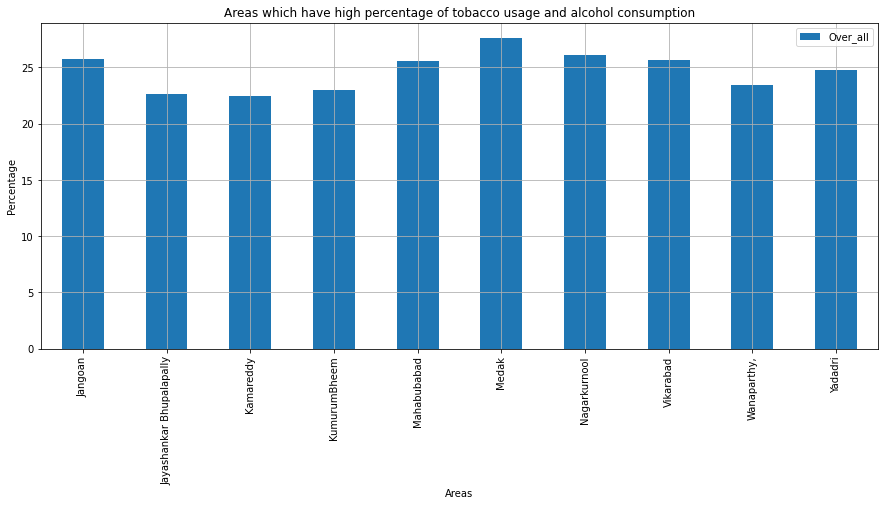

In [11]:
# Representation of bar graph of top 10 areas based on their over all tobacco and alcohol consumption percentage
# areas on x-axis
# percentage on y-axis
df2 = df.head(10)
h = df2.pivot_table(index = ['Places'] )
h.plot(kind="bar",figsize = (15,6))
plt.xlabel("Areas")
plt.ylabel("Percentage")
plt.title("Areas which have high percentage of tobacco usage and alcohol consumption")
plt.grid(True)
plt.show()

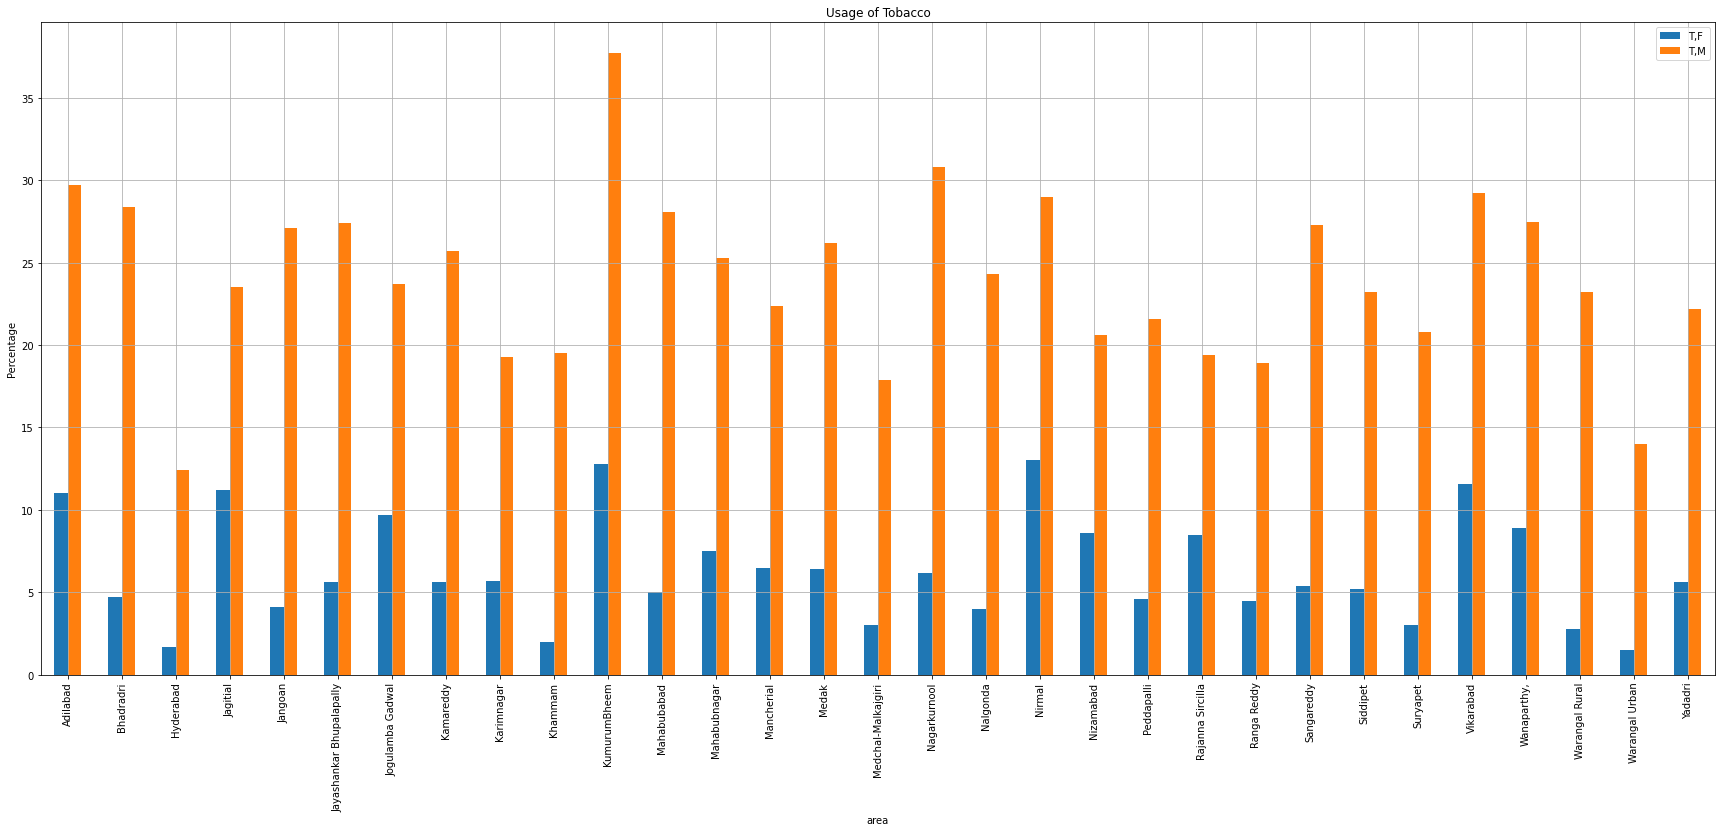

In [12]:
# Representation of bar graph on usage of tobacco by men( orange colour) and women( blue colour) in all areas
# area on x-axis
# percentage on y-axis
data2.plot(x="Place", y=["T,F", "T,M"], kind="bar",figsize = (30,12)) 

plt.xlabel("area")
plt.ylabel("Percentage")
plt.title("Usage of Tobacco")
plt.grid(True)
plt.show()

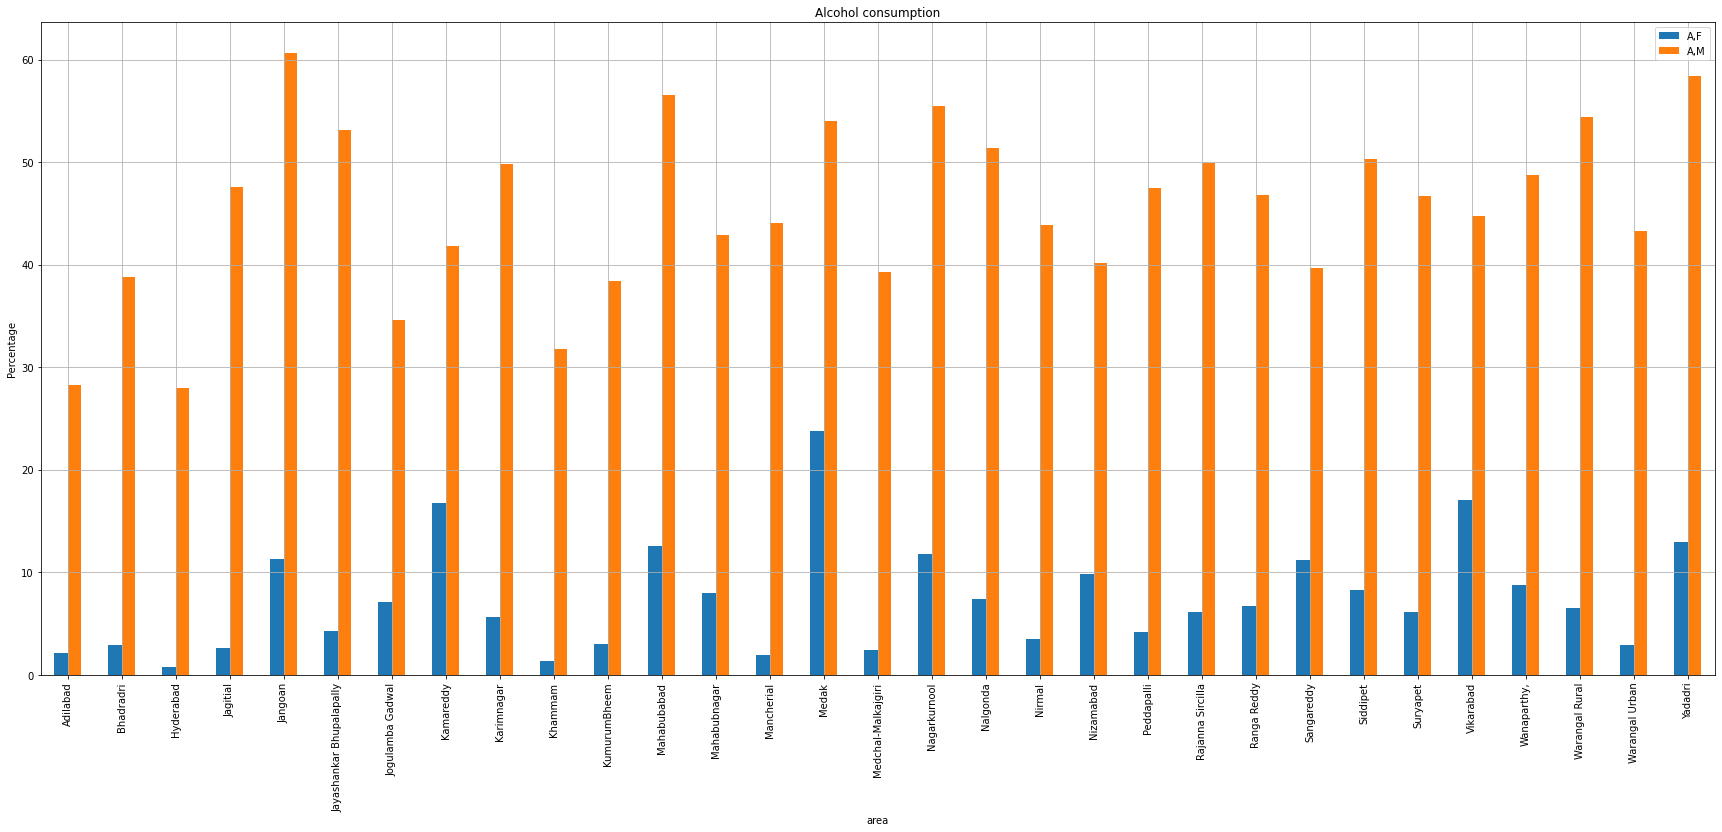

In [13]:
# Representation of bar graph on consumption of alcohol by men( orange colour) and women( blue colour) in all areas
# area on x-axis
# percentage on y-axis

data2.plot(x="Place", y=["A,F", "A,M"], kind="bar",figsize = (30,12))

plt.xlabel("area")
plt.ylabel("Percentage")
plt.title("Alcohol consumption")
plt.grid(True)
plt.show()

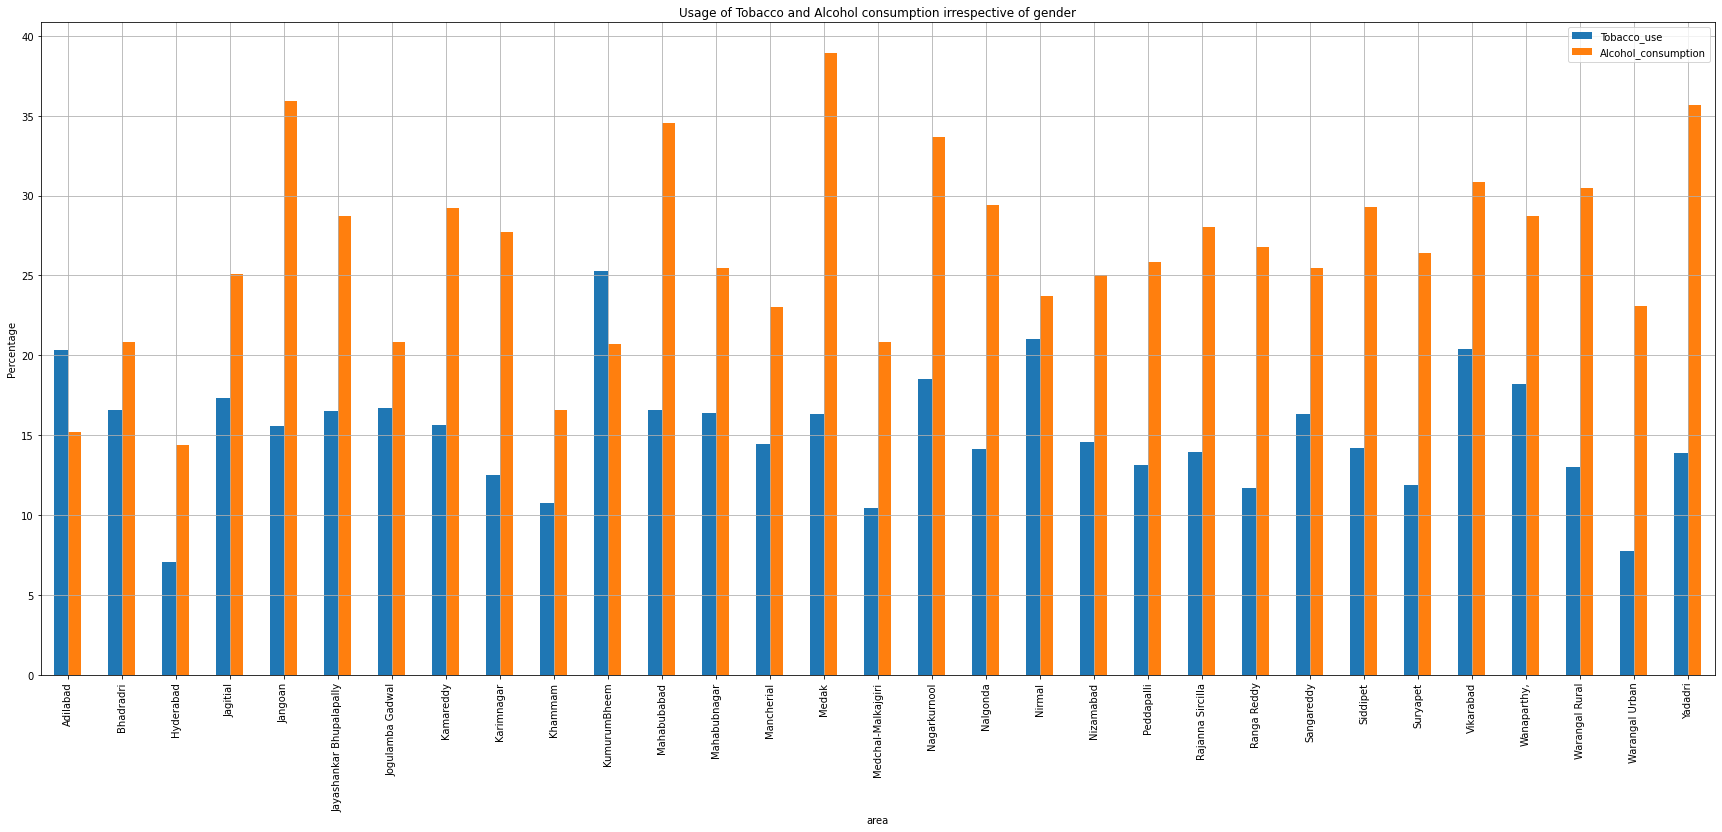

In [14]:
# Usage of Tobacco and Alcohol consumption irrespective of gender

data2.plot(x="Place", y=["Tobacco_use", "Alcohol_consumption"], kind="bar",figsize = (30,12))

plt.xlabel("area")
plt.ylabel("Percentage")
plt.title("Usage of Tobacco and Alcohol consumption irrespective of gender")
plt.grid(True)
plt.show()

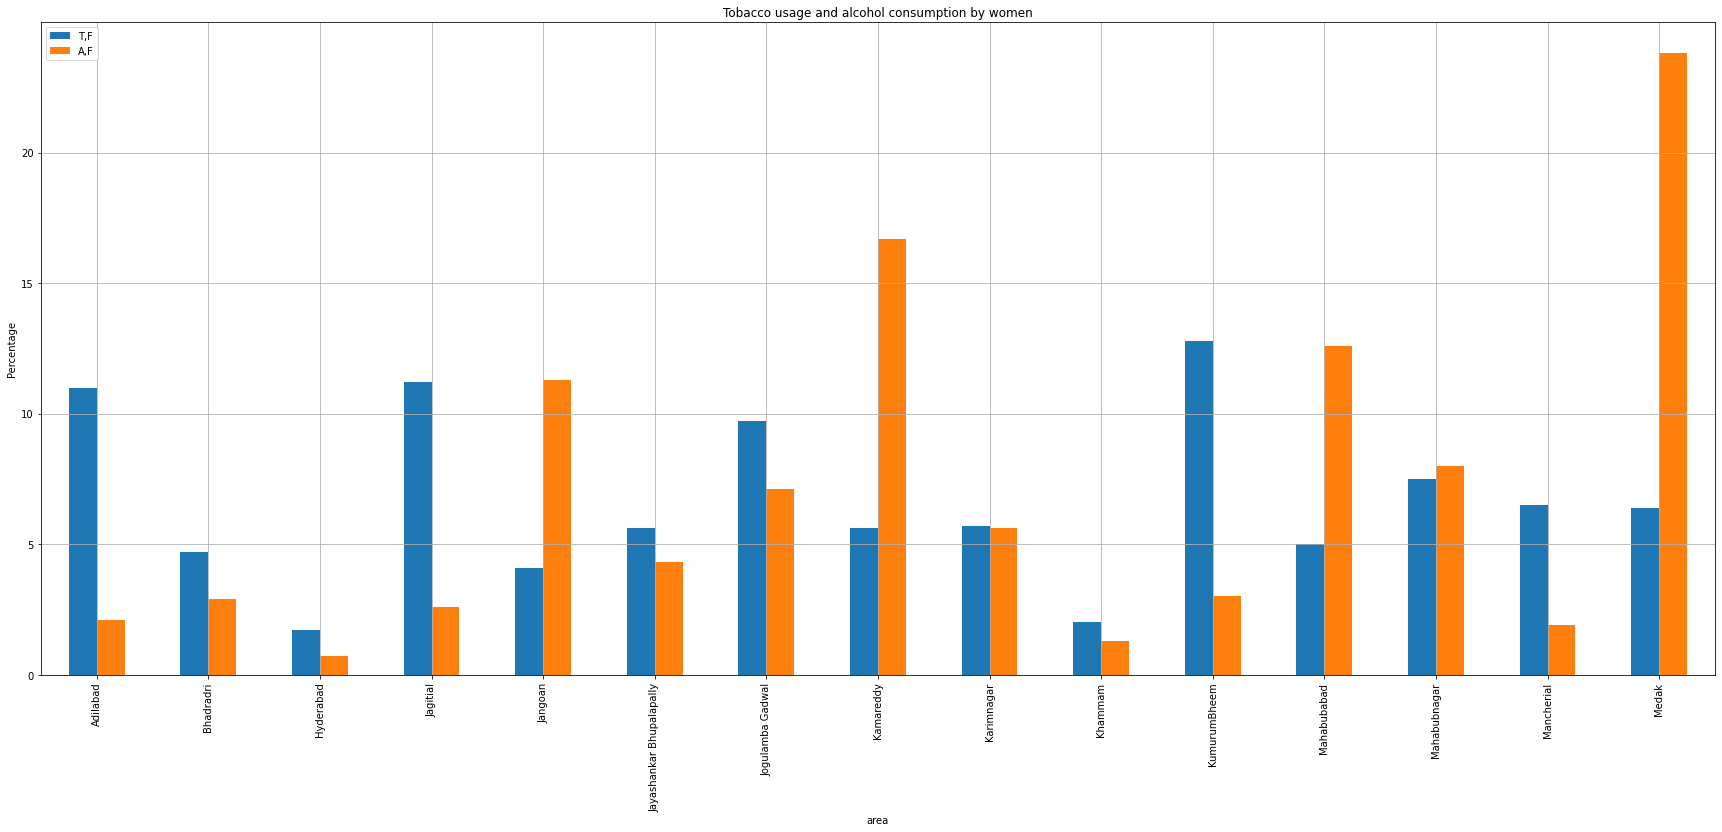

In [15]:
# Representing bar graphs of Tobacco usage and alcohol consumption by women
# T - Tobacco, A - Alcohol, F - Women
data2.head(15).plot(x="Place", y=["T,F", "A,F"], kind="bar",figsize = (30,12))

plt.xlabel("area")
plt.ylabel("Percentage")
plt.title("Tobacco usage and alcohol consumption by women")
plt.grid(True)
plt.show()

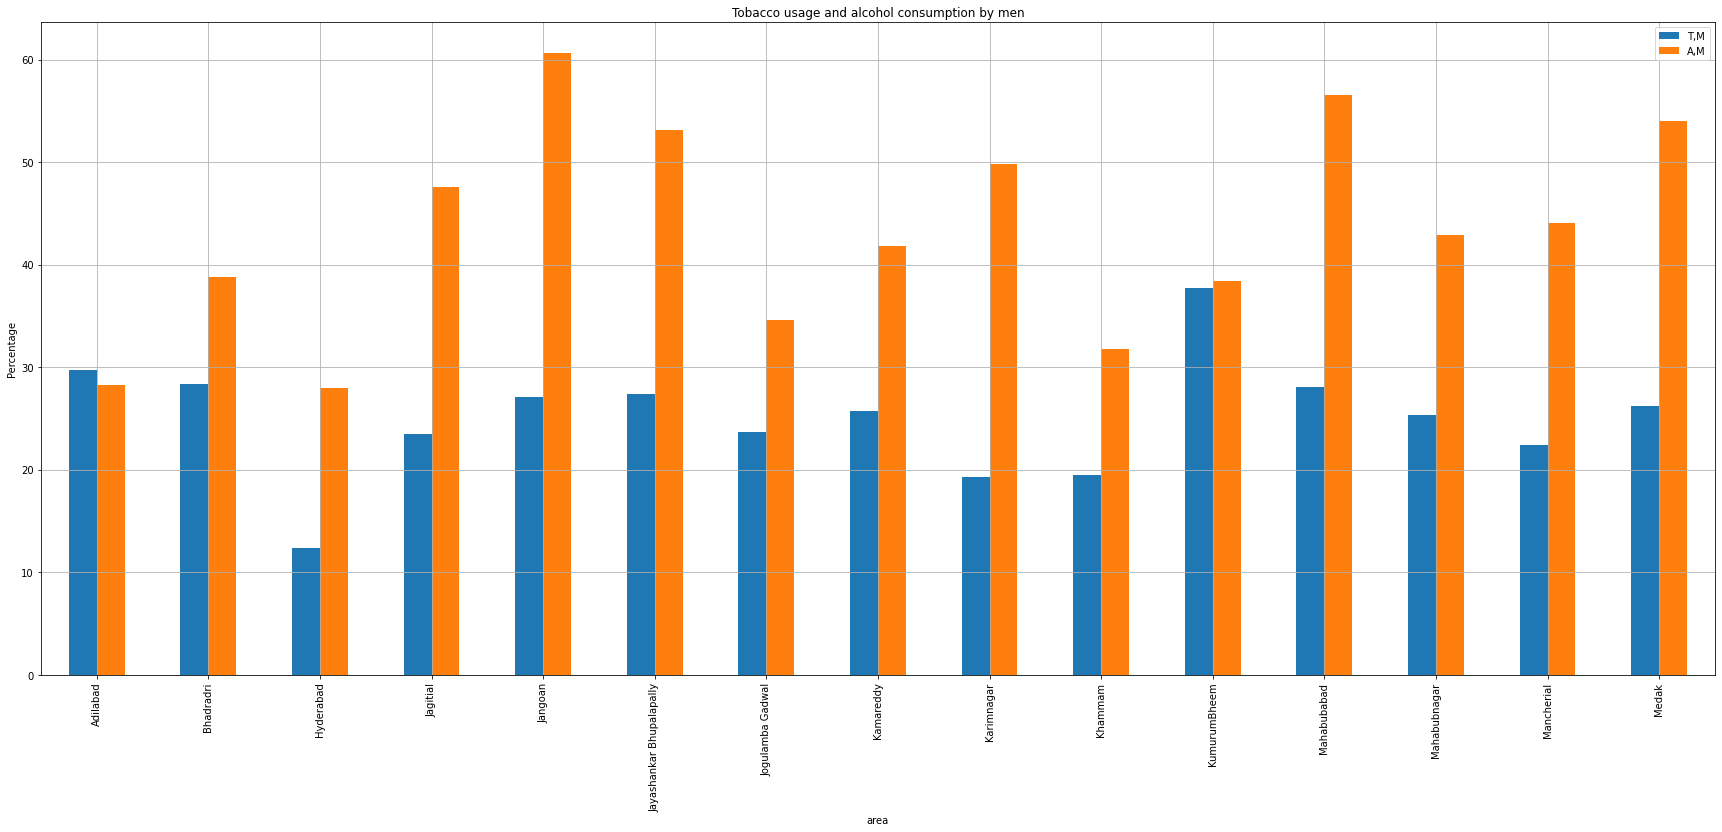

In [16]:
# Representing bar graphs of Tobacco usage and alcohol consumption by men
# T - Tobacco, A - Alcohol, M - Men
data2.head(15).plot(x="Place", y=["T,M", "A,M"], kind="bar",figsize = (30,12))

plt.xlabel("area")
plt.ylabel("Percentage")
plt.title("Tobacco usage and alcohol consumption by men")
plt.grid(True)
plt.show()

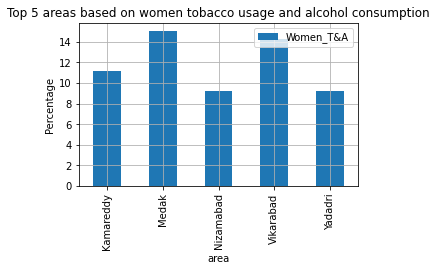

In [17]:

new_dict = {}
for i in range(0,31):
    new_dict.update({data2["Place"][i]:data2["Women_T&A"][i]})

new_dict=sorted(new_dict.items(), key=lambda data2: data2[1], reverse=True)
sort_dict=dict([(v,k) for v,k in new_dict])

df2 = pd.DataFrame(list(sort_dict.items()),columns = ['Places','Women_T&A']) 

# Bar graphs of top 5 areas based on women tobacco usage and alcohol consumption

df3 = df2.head(5)
h = df3.pivot_table(index = ['Places'] )
h.plot(kind="bar",figsize = (5,3))
plt.title("Top 5 areas based on women tobacco usage and alcohol consumption")
plt.xlabel("area")
plt.ylabel("Percentage")
plt.grid(True)
plt.show()

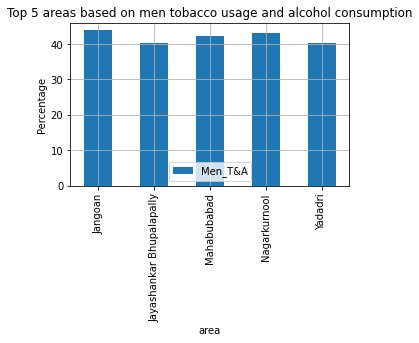

In [18]:
new_dict = {}
for i in range(0,31):
    new_dict.update({data2["Place"][i]:data2["Men_T&A"][i]})

# sorting
new_dict=sorted(new_dict.items(), key=lambda data2: data2[1], reverse=True)
sort_dict=dict([(v,k) for v,k in new_dict])

df2 = pd.DataFrame(list(sort_dict.items()),columns = ['Places','Men_T&A']) 

# Bar graphs of top 5 areas based on men tobacco usage and alcohol consumption

df3 = df2.head(5)
h = df3.pivot_table(index = ['Places'] )
h.plot(kind="bar",figsize = (5,3))
plt.title("Top 5 areas based on men tobacco usage and alcohol consumption")
plt.xlabel("area")
plt.ylabel("Percentage")
plt.grid(True)
plt.show()

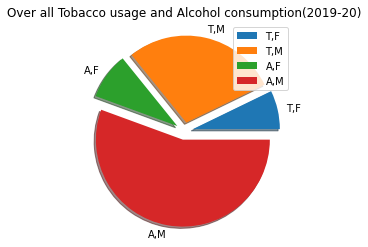

In [19]:
# Pie-chart for over all Tobacco usage and Alcohol consumption during 2019-20
# T - tobacco, A - Alcohol, M - Men, F - Women

plt.title("Over all Tobacco usage and Alcohol consumption(2019-20)")
plt.pie(data["Total (2019-20)"], labels = data["Compound, Gender"],explode = [0.1,0.1,0.1,0.1],shadow =True)
plt.legend(title = "")
plt.show()

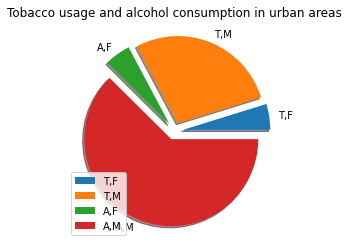

In [20]:
# Pie-chart for over all Tobacco usage and Alcohol consumption in urban areas
# T - tobacco, A - Alcohol, M - Men, F - Women

plt.pie(data["Urban"], labels = data["Compound, Gender"],explode = [0.1,0.1,0.1,0.1],shadow =True)
plt.legend(title = "")
plt.title("Tobacco usage and alcohol consumption in urban areas")
plt.show()


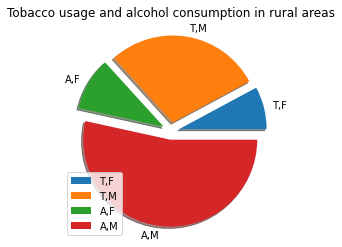

In [21]:
# Pie-chart for over all Tobacco usage and Alcohol consumption in rural areas
# T - tobacco, A - Alcohol, M - Men, F - Women

plt.pie(data["Rural"], labels = data["Compound, Gender"],explode = [0.1,0.1,0.1,0.1],shadow =True)
plt.legend(title = "")
plt.title("Tobacco usage and alcohol consumption in rural areas")
plt.show()